In [3]:
# Bibliotheken importieren

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

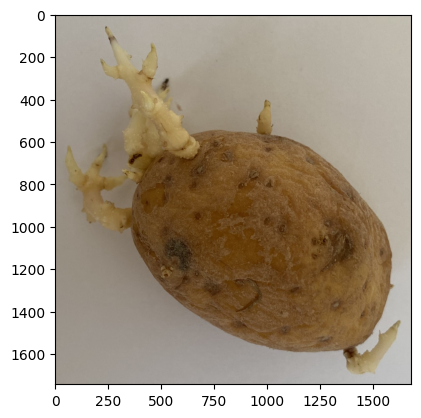

In [4]:
# Bild importieren

img_bgr = cv.imread(r'C:\Users\peter\Downloads\Testbilder\kartoffel_trieb_89_cut.jpeg')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # somit wird gleich richtig eingelesen, openCV arbeitet sonst mit BGR
plt.imshow(img_rgb)
#print(img_rgb)

Hier würde ich jetzt Bounding Box ziehen 
--> reduziert Rechenzeit meiner Schleifen enorm
--> deshalb oben direkt ..._cut.jpg reingeladen

1743
1679


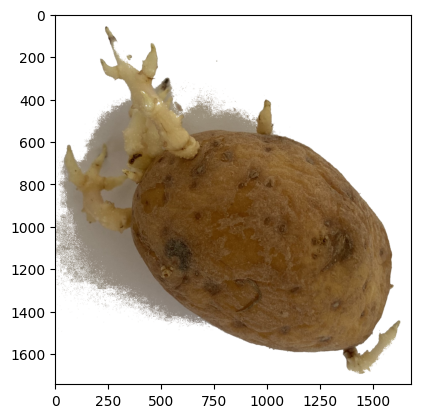

In [5]:
# Dimensionen des Bildes ausgeben -> nur zur Kontrolle der Schleife
print(len(img_rgb))         # entspricht Höhe
print(len(img_rgb[0]))      # entspricht Breite

# Alle Pixel bei denen sowohl Rot, als auch Grün und Blau größer ca. 175 sind WEISS einfärben
for i in range(len(img_rgb)):
    for j in range(len(img_rgb[0])):
        Farben = img_rgb[i][j]
        #print(Farben)
        if Farben[0] >= 130 and Farben[1] >= 130 and Farben[2] >= 130:      
            # Wert muss noch verfeinert werden
            # bei meiner Beleuchtung würde ich eine höhere Schwelle für Rot nehmen => 190 / 175 / 175
            # Schwellenwert ist stark von Beleuchtung abhängig ... jedesmal Schwelle anpassen aber dumm ... 2-4 Klassen à la Leon dürfte sinniger sein
            img_rgb[i][j] = (255,255,255)

plt.imshow(img_rgb)

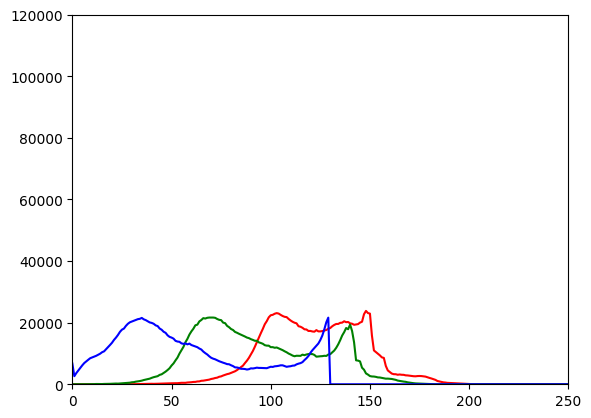

In [6]:
# Plotten mit Matplotlib, basierend auf OpenCV
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,250])
    plt.ylim([0,120000]) 
    # 50.000 sind geraten
    # y muss aber beschränkt werden, da sonst weiß dominiert und man Werte auf y-Achse nicht vernünftig ablesen kann
plt.show()

img_green = img_rgb.copy()
H = (len(img_green))         # entspricht Höhe
B = (len(img_green[0]))      # entspricht Breite
count = 0

for i in range(len(img_green)):
    for j in range(len(img_green[0])):
        Farben = img_green[i][j]
        if Farben[1] >= 40 and Farben[1] <230:                      
            # erster Wert muss noch verfeinert werden
            # für mein Auge und laut Histogramm erst ab ca. 40 so richtig "grün"
            count = count + 1
            Farben[0] = 0
            Farben[2] = 0

            img_green[i][j] = Farben
            
plt.imshow(img_green)

print(count)
print(count/(H*B)*100)

img_green_2 = img_rgb.copy()
H = (len(img_green_2))         # entspricht Höhe
B = (len(img_green_2[0]))      # entspricht Breite
count = 0

for i in range(len(img_green_2)):
    for j in range(len(img_green_2[0])):
        Farben = img_green_2[i][j]
        if Farben[1] < 230 and Farben[1] > Farben[0] and Farben[1] > Farben[2]:                    
            # anderer Ansatz: Grün ist es, wenn mehr Grün als andere Farben enthalten ist
            count = count + 1
            Farben[0] = 0
            Farben[2] = 0
            img_green_2[i][j] = Farben
        else:
            img_green_2[i][j] = (0,0,0)
            
plt.imshow(img_green_2)

print(count)
print(count/(H*B)*100)

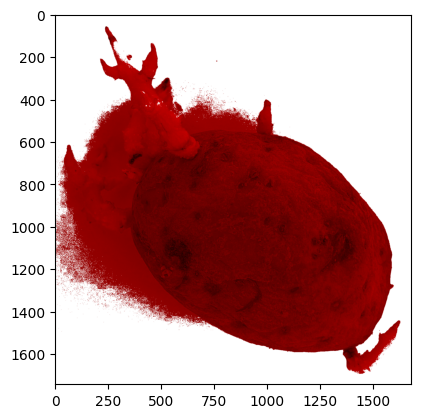

In [7]:
# Zusatz: Falschfarbenbild mal anders ---> funktioniert aber nicht so gut ...

img_obj = img_rgb.copy()
H = (len(img_obj))         # entspricht Höhe
B = (len(img_obj[0]))      # entspricht Breite

for i in range(len(img_obj)):
    for j in range(len(img_obj[0])):
        Farben = img_obj[i][j]
        if Farben[0] < 230 and Farben[0] > Farben[1] and Farben[0] > Farben[2]:                    
            Farben[1] = 0
            Farben[2] = 0
            img_obj[i][j] = Farben
        if Farben[1] < 230 and Farben[1] > Farben[0] and Farben[1] > Farben[2]:                    
            Farben[0] = 0
            Farben[2] = 0
            img_obj[i][j] = Farben
        if Farben[2] < 230 and Farben[2] > Farben[0] and Farben[2] > Farben[1]:                    
            Farben[0] = 0
            Farben[1] = 0
            img_obj[i][j] = Farben
   #     else:
    #        img_obj[i][j] = (0,0,0)
            
plt.imshow(img_obj)